<a href="https://colab.research.google.com/github/anerocha/analise_exploratoria/blob/main/Profissao_Analista_de_dados_M16_2_Exercicio_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Este projeto tem como objetivo analisar dados logísticos de entregas no Distrito Federal, concentrando-se na distribuição de hubs e na eficácia das entregas em diferentes regiões. Utilizando bibliotecas como Pandas, GeoPandas, Matplotlib e Seaborn, a pesquisa explora variáveis geoespaciais, incluindo coordenadas de longitude e latitude, para mapear a localização dos hubs e dos pontos de entrega.

A análise abrange a proporção de entregas por região do Distrito Federal, a capacidade dos veículos envolvidos no transporte e as relações entre densidade urbana e posicionamento estratégico dos hubs. Visualizações gráficas, como gráficos de barras e de dispersão, são criadas para identificar padrões na distribuição das entregas e compreender a dinâmica logística local. O objetivo final é otimizar processos de entrega, proporcionando uma visão clara sobre a eficiência operacional e permitindo decisões mais informadas.

## 2\. Pacotes e bibliotecas

In [ ]:
!pip3 install geopandas
!pip install tabula-py PyPDF2

import json
import tabula
import PyPDF2
from PyPDF2 import PdfReader
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.5 MB/s eta 0:00:00


## 3\. Exploração de dados

In [ ]:
import json
import pandas as pd

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

with open('deliveries.json', mode='r', encoding='utf8') as file:
    data = json.load(file)

deliveries_df = pd.DataFrame(data)

deliveries_df.head()


,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
hub_origin_df = pd.json_normalize(deliveries_df["origin"])
hub_origin_df

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145
...,...,...
194,-47.893662,-15.805118
195,-47.802665,-15.657014
196,-47.893662,-15.805118
197,-48.054989,-15.838145


In [ ]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)

deliveries_df = deliveries_df.drop("origin", axis=1, errors='ignore')

deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]

deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)

print(deliveries_df.head())


           name region    hub_lng    hub_lat  vehicle_capacity  \
0  cvrp-2-df-33   df-2 -48.054989 -15.838145               180   
1  cvrp-2-df-73   df-2 -48.054989 -15.838145               180   
2  cvrp-2-df-20   df-2 -48.054989 -15.838145               180   
3  cvrp-1-df-71   df-1 -47.893662 -15.805118               180   
4  cvrp-2-df-87   df-2 -48.054989 -15.838145               180   

                                          deliveries  
0  [{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...  
1  [{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...  
2  [{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...  
3  [{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...  
4  [{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...  


In [ ]:
deliveries_exploded_df = deliveries_df[['deliveries']].explode('deliveries')
deliveries_exploded_df

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."
...,...
198,"{'id': '21693bf442ac5890adbdf2648c12881a', 'po..."
198,"{'id': '7aaa35088b37b6e542c4cd69663a7ebf', 'po..."
198,"{'id': '60c00d5390da4f28167439cd9c566703', 'po..."
198,"{'id': '51f456963785e7381243ff7baf7efd06', 'po..."


In [ ]:
delivery_sizes = deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])
delivery_ids = deliveries_exploded_df["deliveries"].apply(lambda record: record["id"])
delivery_lngs = deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])
delivery_lats = deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])

print(deliveries_normalized_df.head())


   delivery_size                       delivery_id  delivery_lng  delivery_lat
0              9  313483a19d2f8d65cd5024c8d215cfbd    -48.116189    -15.848929
0              2  320c94b17aa685c939b3f3244c3099de    -48.118195    -15.850772
0              1  3663b42f4b8decb33059febaba46d5c8    -48.112483    -15.847871
0              2   e11ab58363c38d6abc90d5fba87b7d7    -48.118023    -15.846471
0              7  54cb45b7bbbd4e34e7150900f92d7f4b    -48.114898    -15.858055


In [ ]:
deliveries_df = deliveries_df.drop("deliveries", axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_id,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,313483a19d2f8d65cd5024c8d215cfbd,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,320c94b17aa685c939b3f3244c3099de,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,3663b42f4b8decb33059febaba46d5c8,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,e11ab58363c38d6abc90d5fba87b7d7,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,54cb45b7bbbd4e34e7150900f92d7f4b,-48.114898,-15.858055


## 4\. Manipulação

In [ ]:
import json
import pandas as pd

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

with open('deliveries.json', mode='r', encoding='utf8') as file:
    data = json.load(file)

deliveries_df = pd.DataFrame(data)

deliveries_df.head()


,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv
deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")

deliveries_geodata_df.head()


,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]], how="inner", left_index=True, right_index=True)

deliveries_df.head()


,name,region,origin,vehicle_capacity,deliveries,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",Ceilândia,P Sul
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",Ceilândia,P Sul
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",Ceilândia,P Sul
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",Ceilândia,P Sul
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:
deliveries_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              199 non-null    object
 1   region            199 non-null    object
 2   origin            199 non-null    object
 3   vehicle_capacity  199 non-null    int64 
 4   deliveries        199 non-null    object
 5   delivery_city     199 non-null    object
 6   delivery_suburb   192 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.4+ KB


In [ ]:
deliveries_df.isna().any()


,0
name,False
region,False
origin,False
vehicle_capacity,False
deliveries,False
delivery_city,False
delivery_suburb,True


In [ ]:
missing_city_pct = 100 * (deliveries_df["delivery_city"].isna().sum() / len(deliveries_df))
print(f"Percentual de valores faltantes em 'delivery_city': {missing_city_pct}%")


Percentual de valores faltantes em 'delivery_city': 0.0%


In [ ]:
missing_suburb_pct = 100 * (deliveries_df["delivery_suburb"].isna().sum() / len(deliveries_df))
print(f"Percentual de valores faltantes em 'delivery_suburb': {missing_suburb_pct}%")


Percentual de valores faltantes em 'delivery_suburb': 3.5175879396984926%


In [ ]:
prop_city_df = deliveries_df[["delivery_city"]].value_counts() / len(deliveries_df)
prop_city_df = prop_city_df.sort_values(ascending=False)

print("Top 10 cidades mais frequentes:")
print(prop_city_df.head(10))


Top 10 cidades mais frequentes:
delivery_city          
Gama                       0.482412
Ceilândia                  0.180905
Águas Claras               0.115578
Núcleo Bandeirante         0.105528
Sol Nascente/Pôr do Sol    0.090452
Riacho Fundo               0.015075
Park Way                   0.010050
Name: count, dtype: float64


In [ ]:
prop_suburb_df = deliveries_df[["delivery_suburb"]].value_counts() / len(deliveries_df)
prop_suburb_df = prop_suburb_df.sort_values(ascending=False)

print("Top 10 subúrbios mais frequentes:")
print(prop_suburb_df.head(10))


Top 10 subúrbios mais frequentes:
delivery_suburb        
Setor Central              0.266332
P Sul                      0.175879
Setor Oeste                0.125628
Águas Claras               0.115578
Sol Nascente/Pôr do Sol    0.090452
Vila Roriz                 0.050251
Vila Cauhy                 0.040201
Setor Sul                  0.035176
Vila Nova Divinéia         0.030151
Metropolitana              0.015075
Name: count, dtype: float64


## 5\. Visualização

In [ ]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps

import geopandas as gpd
mapa = gpd.read_file("./maps/LIM_Unidade_Federacao_A.shp")

mapa = mapa.loc[[0]]

print(mapa.head())


   ID_ANTIGO              NOME         NOMEABREV GEOMETRIAA SIGLA GEOCODIGO  \
0        461  Distrito Federal  Distrito Federal       None    DF        53   

  TX_COMENTA  ID_PRODUTO  ID_ELEMENT  \
0       None         NaN         NaN   

                                            geometry  
0  POLYGON Z ((-47.31048 -16.03602 0, -47.31057 -...  


In [ ]:
import json
import pandas as pd

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

with open('deliveries.json', mode='r', encoding='utf8') as file:
    data = json.load(file)

deliveries_df = pd.DataFrame(data)

hub_origin_df = pd.json_normalize(deliveries_df["origin"])

deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)

deliveries_df = deliveries_df.drop("origin", axis=1)
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)

hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]].drop_duplicates().reset_index(drop=True)

import geopandas as gpd
geo_hub_df = gpd.GeoDataFrame(hub_df, geometry=gpd.points_from_xy(hub_df["hub_lng"], hub_df["hub_lat"]))

print(geo_hub_df.head())


  region    hub_lng    hub_lat                     geometry
0   df-2 -48.054989 -15.838145  POINT (-48.05499 -15.83814)
1   df-1 -47.893662 -15.805118  POINT (-47.89366 -15.80512)
2   df-0 -47.802665 -15.657014  POINT (-47.80266 -15.65701)


In [ ]:
import json
import pandas as pd
import geopandas as gpd

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

with open('deliveries.json', mode='r', encoding='utf8') as file:
    data = json.load(file)

deliveries_df = pd.DataFrame(data)

hub_origin_df = pd.json_normalize(deliveries_df["origin"])
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)

deliveries_df = deliveries_df.drop("origin", axis=1)
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)

deliveries_exploded_df = deliveries_df[['deliveries']].explode('deliveries')

delivery_lngs = deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])
delivery_lats = deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])

deliveries_normalized_df = pd.DataFrame({
    "delivery_lng": delivery_lngs,
    "delivery_lat": delivery_lats
})

deliveries_df = deliveries_df.drop("deliveries", axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)

geo_deliveries_df = gpd.GeoDataFrame(deliveries_df, geometry=gpd.points_from_xy(deliveries_df["delivery_lng"], deliveries_df["delivery_lat"]))

print(geo_deliveries_df.head())


           name region  vehicle_capacity    hub_lng    hub_lat  delivery_lng  \
0  cvrp-2-df-33   df-2               180 -48.054989 -15.838145    -48.116189   
0  cvrp-2-df-33   df-2               180 -48.054989 -15.838145    -48.118195   
0  cvrp-2-df-33   df-2               180 -48.054989 -15.838145    -48.112483   
0  cvrp-2-df-33   df-2               180 -48.054989 -15.838145    -48.118023   
0  cvrp-2-df-33   df-2               180 -48.054989 -15.838145    -48.114898   

   delivery_lat                     geometry  
0    -15.848929  POINT (-48.11619 -15.84893)  
0    -15.850772  POINT (-48.11819 -15.85077)  
0    -15.847871  POINT (-48.11248 -15.84787)  
0    -15.846471  POINT (-48.11802 -15.84647)  
0    -15.858055   POINT (-48.1149 -15.85805)  


<ipython-input-7-3c755269c6db>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


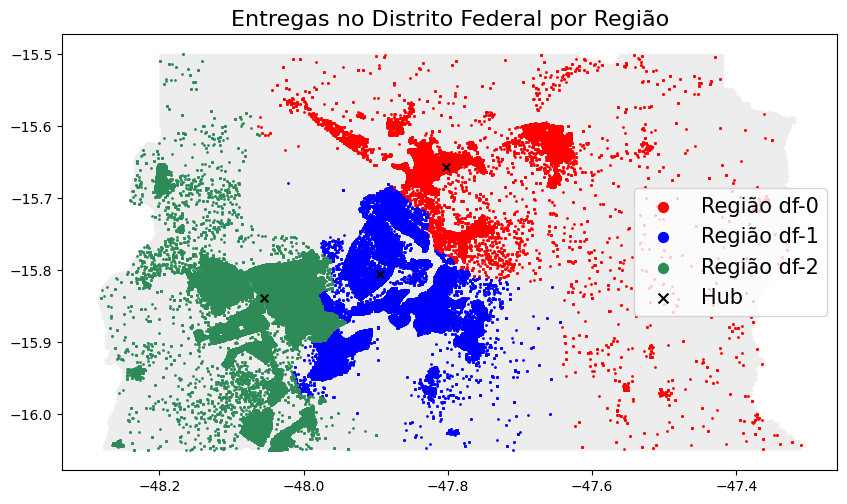

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color="red", label="Região df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color="blue", label="Região df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color="seagreen", label="Região df-2")

# Plotar os hubs
geo_hub_df.plot(ax=ax, markersize=30, marker="x", color="black", label="Hub")

plt.title("Entregas no Distrito Federal por Região", fontsize=16)
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

plt.show()


  region  vehicle_capacity  proportion
0   df-1               180    0.478988
1   df-2               180    0.410783
2   df-0               180    0.110229


<ipython-input-10-1020204fb19e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="proportion", errorbar=None, palette="pastel")


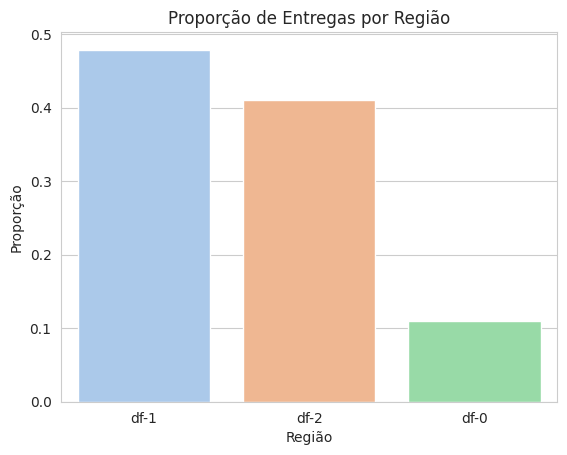

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()
data.rename(columns={0: "proportion"}, inplace=True)

print(data.head())

with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data=data, x="region", y="proportion", errorbar=None, palette="pastel")
    grafico.set(title='Proporção de Entregas por Região', xlabel='Região', ylabel='Proporção')

plt.show()


## 6\. Insiting





*   **Otimização Logística:** A análise da distribuição de hubs em relação à densidade urbana no Distrito Federal revela oportunidades significativas para otimizar as rotas de entrega. Identificar áreas com alta densidade pode auxiliar no posicionamento estratégico dos hubs, reduzindo custos operacionais e melhorando a eficiência do transporte nas diversas regiões do DF.

*   **Proporção de Entregas por Região:** Visualizar a proporção de entregas por região do Distrito Federal oferece uma perspectiva clara sobre onde estão as concentrações de demanda. Essa informação é vital para guiar decisões sobre a alocação de recursos, permitindo ajustes na capacidade de atendimento em regiões com discrepâncias significativas.

*   **Impacto da Capacidade do Veículo:** A análise da capacidade dos veículos em relação ao volume de entregas no DF fornece insights sobre a adequação da frota atual. Avaliar a necessidade de ajustes na capacidade ou diversificação da frota é essencial para maximizar a eficiência operacional e atender à demanda de maneira mais eficaz.

*  **Dados Geoespaciais:** O uso de dados geoespaciais para mapear hubs e entregas no Distrito Federal proporciona uma visualização clara das operações logísticas atuais e permite modelagem preditiva, antecipando demandas futuras com base em padrões históricos. Essa abordagem pode informar decisões estratégicas sobre a expansão ou realocação de hubs.

*  **Sustentabilidade:** Integrar considerações de sustentabilidade nas operações de entrega no DF é um diferencial importante. A análise da eficiência no uso de veículos, especialmente nas áreas urbanas, pode contribuir para a redução da pegada de carbono, alinhando a logística a práticas ambientalmente responsáveis.

*  **Tecnologia e Inovação:**A integração de tecnologias de rastreamento e otimização em tempo real pode transformar ainda mais a logística no Distrito Federal, permitindo ajustes dinâmicos nas rotas de entrega com base em condições de tráfego ou mudanças na demanda. Investir em soluções tecnológicas pode proporcionar uma vantagem competitiva significativa.



